In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# SexとEmbarkedをダミー変数に変換
df1 = df.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [6]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [9]:
# object型かつ目的変数に関係がないと思われるカラムを削除
df2 = df1.drop(["Name", "Ticket", "Cabin"], axis=1)

In [10]:
df2.head()
# これでdf2のカラムはすべて数値型になったことを確認できた

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [11]:
# 欠損値があるかどうかを確認
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [22]:
# 欠損値を補完する数値を決めるためにmean,medianを調べる
df2["Age"].mean()

29.36158249158249

In [23]:
df2["Age"].median()

28.0

In [14]:
# mean,medianどちらも同じぐらいの値　今回はAgeの欠損値をmedianにする
df2["Age"] = df2["Age"].fillna(df2["Age"].median())

In [16]:
df2.isnull().sum()
# Ageの欠損値が無になったことを確認できた

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

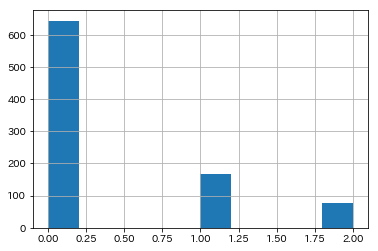

In [17]:
# Embarkedカラムのうちどの数値が多いのか確認
df2["Embarked"].hist()

In [18]:
# 0が多いので欠損値に0を代入
df2["Embarked"] = df2["Embarked"].fillna(0)

In [20]:
df2.isnull().sum()
# すべてのカラムの欠損値の無を確認

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
df2.shape

(891, 9)

In [25]:
# 数値型への変換、欠損値の補完が済んだので相関を見る
df2.corr()
# Ageが関係ありそう、次にFare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [26]:
# pandasのDataFrameはそのままではscikit-learnに渡せない。
# 数値データではないカラムへの対処、数値データのnumpy.ndarrayへの変換が必要らしい
# 数値データへの変換は完了済み
# 最後にvaluesメソッドを使うことでnumpy.ndarrayに変換可能
train_data = df2.values

In [28]:
train_data # head関数を使うとエラーに

array([[   1.    ,    0.    ,    3.    , ...,    0.    ,    7.25  ,    0.    ],
       [   2.    ,    1.    ,    1.    , ...,    0.    ,   71.2833,    1.    ],
       [   3.    ,    1.    ,    3.    , ...,    0.    ,    7.925 ,    0.    ],
       ..., 
       [ 889.    ,    0.    ,    3.    , ...,    2.    ,   23.45  ,    0.    ],
       [ 890.    ,    1.    ,    1.    , ...,    0.    ,   30.    ,    1.    ],
       [ 891.    ,    0.    ,    3.    , ...,    0.    ,    7.75  ,    2.    ]])

In [ ]:
# --ここから学習--

In [51]:
# 3列目以降のカラムを学習データに
train_x = train_data[: , 2:]

In [52]:
# Survivedを正解データに
train_y = train_data[:, 1]

In [31]:
# ランダムフォレスト用
from sklearn.ensemble import RandomForestClassifier

In [57]:
# 決定木の数を100に設定してモデルインスタンスを作成
forest = RandomForestClassifier(n_estimators = 100, random_state=0)

In [58]:
# データセットを用意してモデル(今回はランダムフォレスト)も選択できれば、次にやることはトレーニングデータを使った学習です。
# 学習
forest = forest.fit(train_x, train_y)

# clf.fit(x_train, y_train)
# と書くだけです。たった一行書くだけで学習ができます。

In [ ]:
# --ここからテストデータの前処理

In [34]:
df11 = pd.read_csv("test.csv")

In [35]:
df11.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df12 = df11.drop(["Name", "Ticket", "Cabin"], axis=1)
# axis=1を良く忘れてしまう

In [38]:
df12.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [39]:
df13 = df12.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [40]:
df13.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [41]:
df13.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [42]:
df13["Age"] = df13["Age"].fillna(df13["Age"].median())

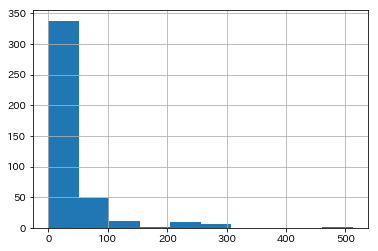

In [43]:
df13["Fare"].hist()

In [44]:
df13["Fare"].mean()

35.6271884892086

In [45]:
df13["Fare"].median()

14.4542

In [46]:
df13["Fare"] = df13["Fare"].fillna(df13["Fare"].median())

In [47]:
df13.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [48]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [49]:
test_data = df13.values

In [50]:
test_data

array([[  8.92000000e+02,   3.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   7.82920000e+00,   2.00000000e+00],
       [  8.93000000e+02,   3.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   7.00000000e+00,   0.00000000e+00],
       [  8.94000000e+02,   2.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   9.68750000e+00,   2.00000000e+00],
       ..., 
       [  1.30700000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   7.25000000e+00,   0.00000000e+00],
       [  1.30800000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   8.05000000e+00,   0.00000000e+00],
       [  1.30900000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   2.23583000e+01,   1.00000000e+00]])

In [54]:
# 予測
# Pclass以降のカラムを説明変数とする
test_x = test_data[: , 1:]

In [55]:
output = forest.predict(test_x)
# 最後はテストデータを使った予測です。
# clf.predict(x_test)
# と書くだけです。学習フェーズと同様、たった一行書くだけで予測ができます。

In [56]:
print(len(test_data[:,0]), len(output))

418 418


In [62]:
test_data[0]

array([ 892.    ,    3.    ,    0.    ,   34.5   ,    0.    ,    0.    ,
          7.8292,    2.    ])

In [59]:
#
# コードの意味は確認できておらず
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

In [60]:
predict_data

[(892, 0),
 (893, 0),
 (894, 0),
 (895, 1),
 (896, 0),
 (897, 0),
 (898, 0),
 (899, 0),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 1),
 (910, 0),
 (911, 0),
 (912, 1),
 (913, 0),
 (914, 1),
 (915, 1),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 1),
 (920, 1),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 1),
 (925, 0),
 (926, 1),
 (927, 1),
 (928, 1),
 (929, 0),
 (930, 0),
 (931, 1),
 (932, 0),
 (933, 1),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 1),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 1),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 0),
 (961, 1),
 (962, 1),
 (963, 0),
 (964, 0),
 (965, 0),
 (966, 1),
 (967, 0),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 1),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 1),
 (979, 0),
 (980, 1),
 (981, 1),
 (982, 0),

In [61]:
#　
# 上記リストをcsvファイルとして出力しカレントディレクトリに保存　という意味
# コードの意味は確認できておらず
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])

In [ ]:
# https://qiita.com/suzumi/items/8ce18bc90c942663d1e6
# を参考にしたが最後の予測部分からcsv出力がわかりにくい、、、

In [ ]:
# https://qiita.com/teru855/items/02bd885179bd8e39ba43
# を参考にしてcsvファイル出力

In [66]:
df_output = pd.read_csv("test.csv")

In [67]:
df_output["Survived"] = output

In [69]:
df_output[["PassengerId","Survived"]].to_csv("output_submission.csv",index=False)